<a href="https://colab.research.google.com/github/zama-sarib/ML-Implementation/blob/master/Assignment%2014_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
!pip install networkx==2.3

In [ ]:
!pip install stellargraph

In [20]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [21]:
data=pd.read_csv('/content/movie_actor_network.csv', index_col=False, names=['movie','actor'])
data.head()

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


In [22]:
data.shape

(9650, 2)

In [23]:
edges = [tuple(x) for x in data.values.tolist()]
print(edges)

[('m1', 'a1'), ('m2', 'a1'), ('m2', 'a2'), ('m3', 'a1'), ('m3', 'a3'), ('m3', 'a4'), ('m3', 'a5'), ('m3', 'a6'), ('m3', 'a7'), ('m4', 'a1'), ('m4', 'a10'), ('m4', 'a8'), ('m4', 'a9'), ('m5', 'a1'), ('m5', 'a11'), ('m5', 'a12'), ('m5', 'a13'), ('m5', 'a14'), ('m5', 'a15'), ('m5', 'a16'), ('m5', 'a17'), ('m5', 'a18'), ('m5', 'a19'), ('m7', 'a21'), ('m7', 'a22'), ('m8', 'a22'), ('m9', 'a22'), ('m9', 'a23'), ('m10', 'a22'), ('m10', 'a24'), ('m10', 'a25'), ('m11', 'a22'), ('m11', 'a26'), ('m11', 'a27'), ('m11', 'a28'), ('m11', 'a29'), ('m24', 'a47'), ('m25', 'a47'), ('m25', 'a48'), ('m25', 'a49'), ('m25', 'a50'), ('m25', 'a51'), ('m25', 'a52'), ('m25', 'a53'), ('m25', 'a54'), ('m25', 'a55'), ('m25', 'a56'), ('m25', 'a57'), ('m25', 'a58'), ('m25', 'a59'), ('m25', 'a60'), ('m25', 'a61'), ('m25', 'a62'), ('m25', 'a63'), ('m25', 'a64'), ('m25', 'a65'), ('m25', 'a66'), ('m25', 'a67'), ('m25', 'a68'), ('m25', 'a69'), ('m25', 'a70'), ('m26', 'a47'), ('m26', 'a71'), ('m26', 'a72'), ('m26', 'a73'), 

In [24]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [25]:
A = list(nx.connected_component_subgraphs(B))[0]
print(A)
print(len(A))


4703


In [26]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


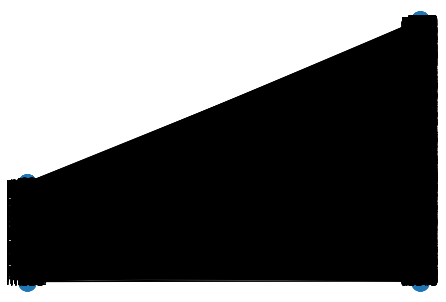

In [27]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [28]:
len(data['actor'].unique())

3411

In [29]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [30]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [82]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [32]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [83]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

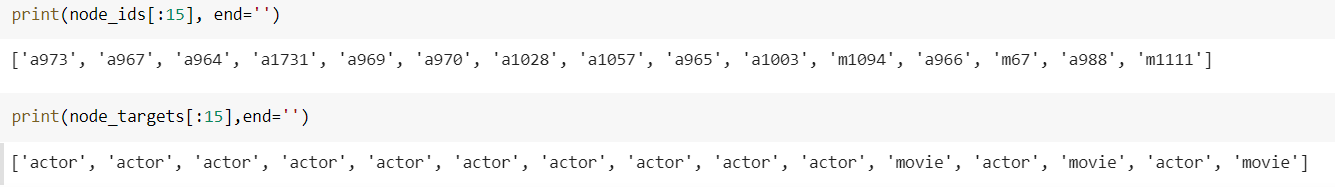

In [35]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    for id in range(len(node_ids)):
        if node_targets[id] == 'actor':
            actor_nodes.append(id)
            actor_embeddings.append(node_embeddings[id])
        else:
            movie_nodes.append(id)
            movie_embeddings.append(node_embeddings[id])


    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [36]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [37]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [176]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1= 0  
    largestConnectedComponent = max(nx.connected_components(graph), key=len) # Number of node in largest Components
    numberOfNodesInComponent = len(list(largestConnectedComponent))  # Number of actor node in largest Components
    numberOfNodesInGraph = graph.number_of_nodes()
    cost1 = (numberOfNodesInComponent)/(numberOfNodesInGraph)    
    
    
    return float(cost1/number_of_clusters)

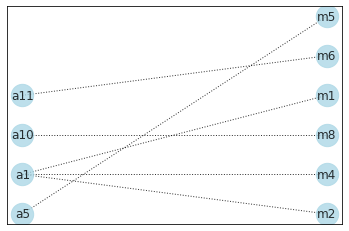

In [143]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [177]:
graded_cost1=cost1(graded_graph,3)
print(graded_cost1)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

0.13333333333333333


True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [178]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost2= 0  
    numberOfMovieNodes = sum([1 for node in graph.nodes() if 'm' in node])
    actorNodes = [node for node in graph.nodes() if 'a' in node]
    degreeSumActorNode = sum([graph.degree(node) for node in actorNodes])
    cost2 = (degreeSumActorNode)/numberOfMovieNodes
    
    return float(cost2/number_of_clusters)

<font color='cyan'>Grader function - 4</font>

In [179]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [189]:
from sklearn.cluster import KMeans
actordata = np.array(actor_embeddings)
no_of_cluster = [3,5,10,30,50,100,200,500]
costone,costtwo = 0,0
total_cost = []
Nocluster = []
# 3,5,10,30,50,100,200,500
for cluster in no_of_cluster:

    costone,costtwo = 0,0

    Kmean_model = KMeans(n_clusters=cluster,init='k-means++')
    Kmean_model.fit(actordata)
    
    labels = Kmean_model.labels_
    uniqueLabels = np.unique(labels)

    for l in uniqueLabels:
        
        point = actordata[np.where(labels==l)][0]
        node = node_ids[np.flatnonzero((point==actor_embeddings).all(1))[0]]
        
        subgraph = nx.ego_graph(B,node)
        costone += cost1(subgraph,cluster)
        costtwo += cost2(subgraph,cluster)

    total_cost.append(costone*costtwo)
    Nocluster.append(cluster)

bestCluster = Nocluster[np.argmax(total_cost)]
print(total_cost)
print(Nocluster)
print(bestCluster)

[127.33333333333334, 108.0, 61.1, 42.59999999999999, 35.04, 30.440000000000058, 19.974999999999984, 9.44800000000011]
[3, 5, 10, 30, 50, 100, 200, 500]
3


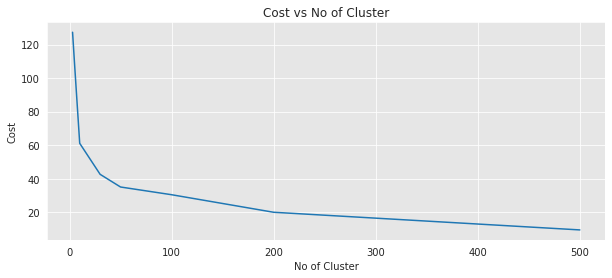

In [190]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,4))
sns.lineplot(x=Nocluster,y=total_cost)
plt.title("Cost vs No of Cluster")
plt.xlabel("No of Cluster")
plt.ylabel("Cost")
plt.show()

In [239]:
from sklearn.cluster import KMeans
actordata = np.array(actor_embeddings)
optimal_cluster = 3

Kmean_model = KMeans(n_clusters=optimal_cluster,init='k-means++')
Kmean_model.fit(actordata)
    
labels = Kmean_model.labels_
uniqueLabels = np.unique(labels)


<font color='blue'>Displaying similar actor clusters</font>

In [240]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

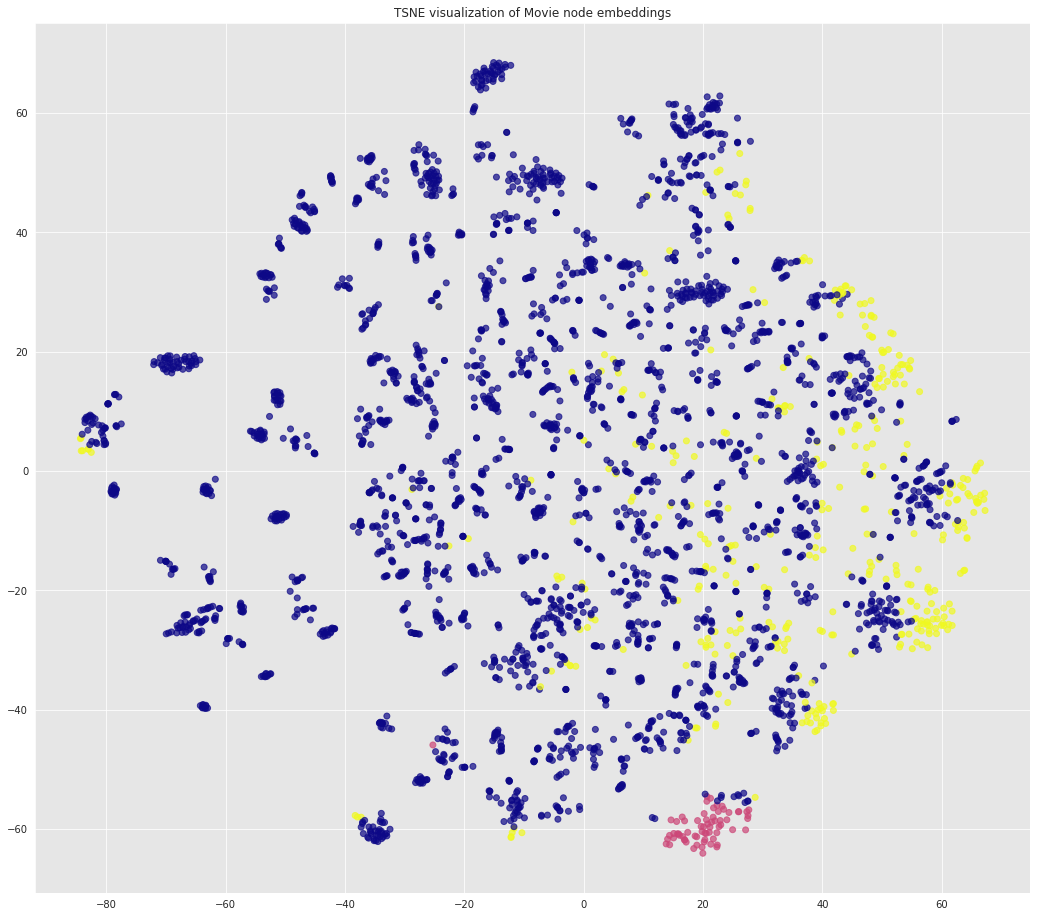

In [241]:
import numpy as np
# draw the point

label_map = { l: i for i, l in enumerate(uniqueLabels)}
node_colours = [ label_map[target] for target in labels]
# node_colours = [ cmap(label_map[target]) for target in labels]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours,cmap='plasma'
            , alpha=0.7)
plt.title('{} visualization of Movie node embeddings'.format(transform.__name__))
# plt.legend()

plt.show()

<font color='blue'>Grouping similar movies</font>

In [182]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1= 0  
    largestConnectedComponent = max(nx.connected_components(graph), key=len) # Number of node in largest Components
    numberOfNodesInComponent = len(list(largestConnectedComponent))  # Number of actor node in largest Components
    numberOfNodesInGraph = graph.number_of_nodes()
    cost1 = (numberOfNodesInComponent)/(numberOfNodesInGraph)    
    
    
    return float(cost1/number_of_clusters)

In [183]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost2= 0 
    numberOfActorNodes = sum([1 for node in graph.nodes() if 'a' in node])
    movieNodes = [node for node in graph.nodes() if 'm' in node]
    degreeSumMovieNode = sum([graph.degree(node) for node in movieNodes])
    cost2 = (degreeSumMovieNode)/numberOfActorNodes
    
    return float(cost2/number_of_clusters)

In [184]:
from sklearn.cluster import KMeans
moviedata = np.array(movie_embeddings)
no_of_cluster = [3,5,10,30,50,100,200,500]
costone,costtwo = 0,0
total_cost = []
Nocluster = []
# 3,5,10,30,50,100,200,500
for cluster in no_of_cluster:

    costone,costtwo = 0,0

    Kmean_model = KMeans(n_clusters=cluster,init='k-means++')
    Kmean_model.fit(moviedata)
    
    labels = Kmean_model.labels_
    uniqueLabels = np.unique(labels)

    for l in uniqueLabels:
        
        point = moviedata[np.where(labels==l)][0]
        node = node_ids[np.flatnonzero((point==movie_embeddings).all(1))[0]]
        
        subgraph = nx.ego_graph(B,node)
        costone += cost1(subgraph,cluster)
        costtwo += cost2(subgraph,cluster)

    total_cost.append(costone*costtwo)
    Nocluster.append(cluster)

bestCluster = Nocluster[np.argmax(total_cost)]
print(total_cost)
print(Nocluster)
print(bestCluster)

[99.66666666666666, 97.4, 57.39999999999999, 51.96666666666665, 46.800000000000026, 32.10000000000005, 19.10999999999998, 9.506000000000093]
[3, 5, 10, 30, 50, 100, 200, 500]
3


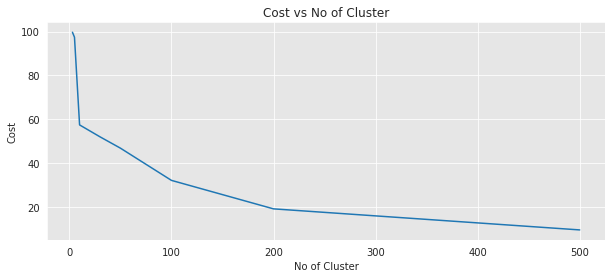

In [188]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,4))
sns.lineplot(x=Nocluster,y=total_cost)
plt.title("Cost vs No of Cluster")
plt.xlabel("No of Cluster")
plt.ylabel("Cost")
plt.show()

In [210]:
from sklearn.cluster import KMeans
moviedata = np.array(movie_embeddings)
optimal_cluster = 3

Kmean_model = KMeans(n_clusters=optimal_cluster,init='k-means++')
Kmean_model.fit(moviedata)
    
labels = Kmean_model.labels_
uniqueLabels = np.unique(labels)


<font color='blue'>Displaying similar movie clusters</font>

In [212]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

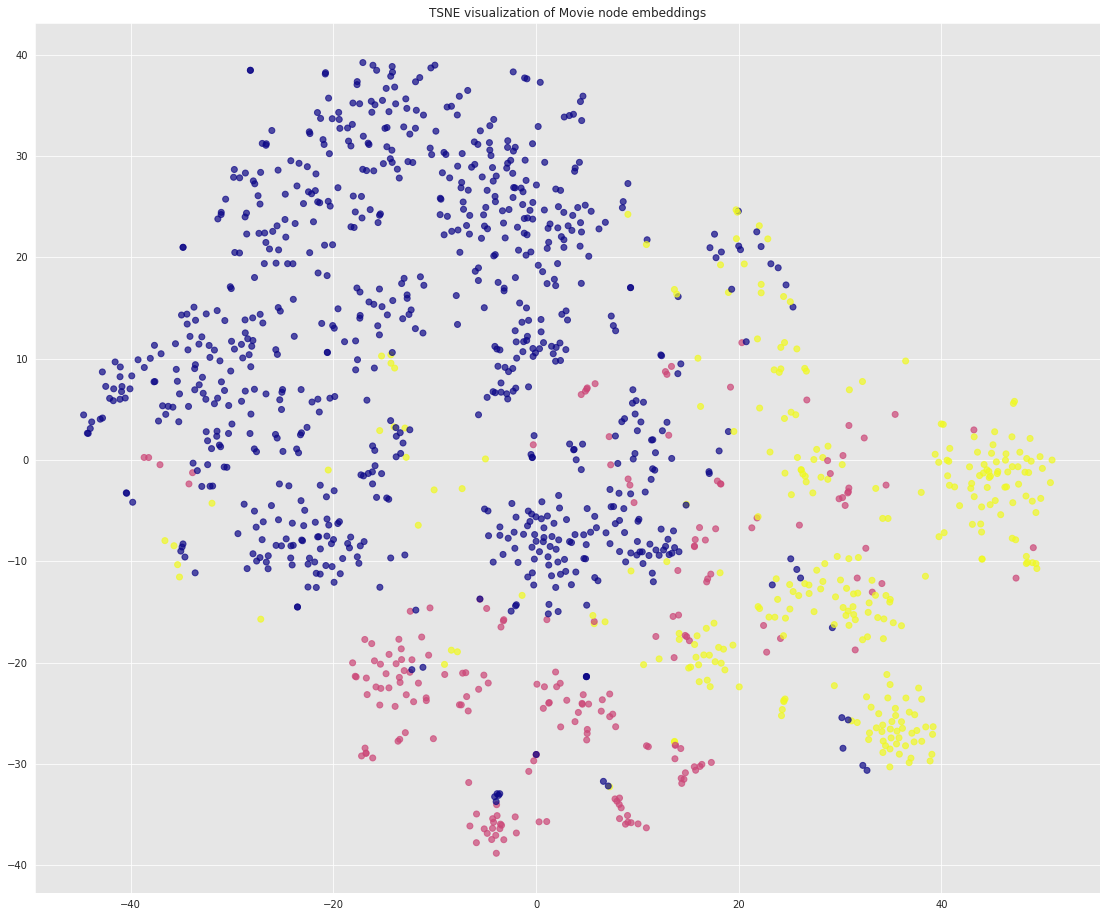

In [235]:
import numpy as np
# draw the point

label_map = { l: i for i, l in enumerate(uniqueLabels)}
node_colours = [ label_map[target] for target in labels]
# node_colours = [ cmap(label_map[target]) for target in labels]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours,cmap='plasma'
            , alpha=0.7)
plt.title('{} visualization of Movie node embeddings'.format(transform.__name__))
# plt.legend()

plt.show()